In [1]:
from typing import Tuple

import numpy as np
import scipy.fft
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.style.use('seaborn')

import pydub as pd
from pathlib import Path
import scipy.signal

# __Homework 14 - Fourier transforms__

# Excercise 1

Take data samples of this even signal at whatever sampling rate you wish, and make a plot of it;
$$
h(t) = 3\cos(2\pi ft)+2\cos(6\pi ft)+\cos(10\pi ft)
$$
Decompose the signal into its components; then check that they are essentially real and in the ratio 3:2:1 (or 9:4:1 for the power spectrum), that the frequencies have the expected values (not just ratios), and that the components sum to give the input signal.

Experiment on the separate effects of picking different values of the step size $\Delta$ and of enlarging the measurement period $T = N\Delta$.

<font color="blue"> **Answer:** </font> 

In [2]:
def take_fft(signal: callable, f: float, cycles: int = 5, tmin: float = 0, N: int = 250000, **kwargs: dict) -> Tuple[np.ndarray, np.ndarray]:
    N = scipy.fft.next_fast_len(N)
    t_max = cycles / f
    t, dt = np.linspace(tmin, t_max, N, retstep=True)
    
    h = signal(t, f, **kwargs)
    
    print(f"Length of time   : {t_max:4.3f} seconds.")
    print(f"Number of cycles : {cycles:4.3f} cycles.")
    print(f"Sampling rate    : {1/dt:4.3f} Hz.")
    
    plt.figure(figsize=(9,6))
    plt.plot(t, h, linewidth=3)
    plt.ylabel("Signal", fontsize=20)
    plt.xlabel("Time (s)", fontsize=20)
    plt.show()
    plt.close()
    
    H = scipy.fft.fft(h)
    freq = scipy.fft.fftfreq(H.size, dt)

    H = scipy.fft.fftshift(H)
    freq = scipy.fft.fftshift(freq)

    plt.figure(figsize=(9, 6))
    plt.plot(freq, np.abs(H), "-", linewidth=2, label="Amplitude")
    plt.plot(freq, np.real(H), ".", markersize=15, label="Real part")
    plt.plot(freq, np.imag(H), ".", markersize=10, label="Imaginary part")
    plt.xlim(-7.5 * f, 7.5 * f)
    plt.legend()
    plt.ylabel("Amplitude", fontsize=20)
    plt.xlabel("Frequency (Hz)", fontsize=20)
    plt.show()
    plt.close()
    
    normalized_H = H / np.max(np.abs(H))

    plt.figure(figsize=(9, 6))
    plt.plot(freq, np.abs(normalized_H), "-", linewidth=2, label="Amplitude")
    plt.plot(freq, np.real(normalized_H), ".", markersize=15, label="Real part")
    plt.plot(freq, np.imag(normalized_H), ".", markersize=10, label="Imaginary part")
    plt.xlim(-7.5 * f, 7.5 * f)
    plt.legend()
    plt.ylabel("Normalized Amplitude", fontsize=20)
    plt.xlabel("Frequency (Hz)", fontsize=20)
    plt.show()
    plt.close()
    
    return H, normalized_H, freq, t, N

Length of time   : 0.800 seconds.
Number of cycles : 4.000 cycles.
Sampling rate    : 31183.750 Hz.


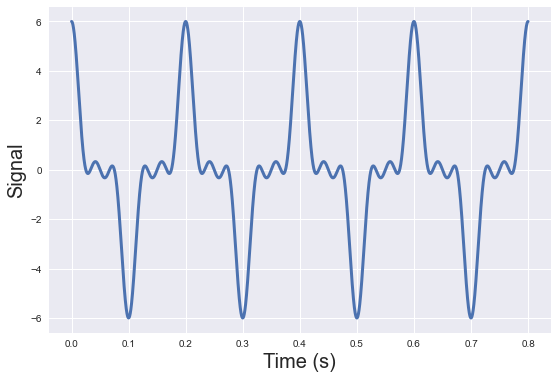

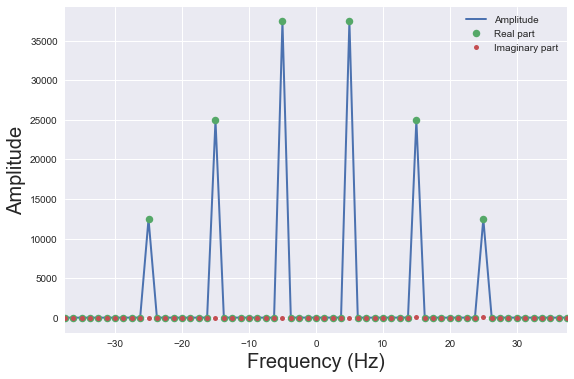

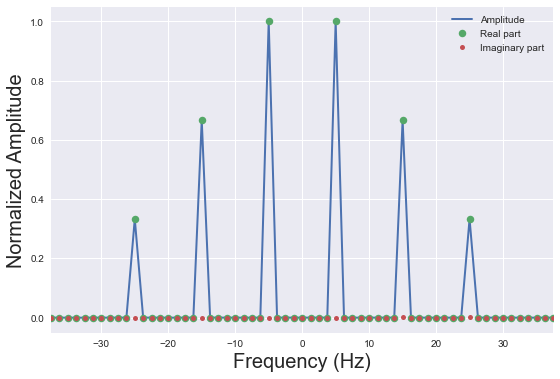

Fourier: 0.333 at -24.999 Hz
Fourier: 0.667 at -14.999 Hz
Fourier: 1.000 at -5.000 Hz
Fourier: 1.000 at 5.000 Hz
Fourier: 0.667 at 14.999 Hz
Fourier: 0.333 at 24.999 Hz


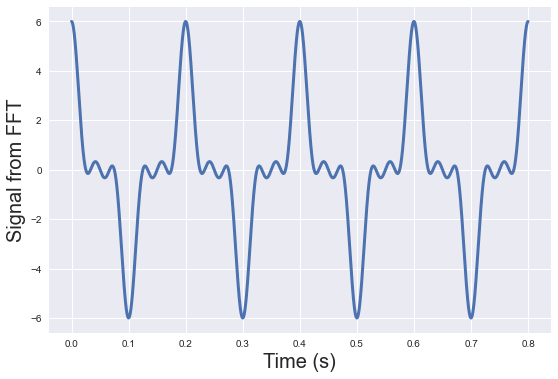

In [3]:
def signal(t: np.ndarray, f: float) -> np.ndarray:
    return 3 * np.cos(2 * np.pi * f * t) + 2 * np.cos(6 * np.pi * f * t) + np.cos(10 * np.pi * f * t)

H, Hn, f, t, n = take_fft(signal, f=5, cycles=4, tmin=0, N=24823)

peaks = np.abs(Hn) > 0.2
Hpeaks = Hn[peaks]
fpeaks = f[peaks]
for hpeak, fpeak in zip(Hpeaks, fpeaks):
    print(f"Fourier: {np.abs(hpeak):.3f} at {fpeak:.3f} Hz")
    
def signal_from_fft(peaks, H, f, n):
    Hpeaks = H[peaks]
    fpeaks = f[peaks]
    def signal(t):
        return np.sum(
            [
                np.abs(Hpeak) * np.cos(2 * np.pi * np.abs(fpeak) * t) / n
                for Hpeak, fpeak in zip(Hpeaks, fpeaks)
            ],
            axis=0
        )
    return signal

signal_from_H = signal_from_fft(peaks, H, f, n)

plt.figure(figsize=(9,6))
plt.plot(t, signal_from_H(t), linewidth=3)
plt.ylabel("Signal from FFT", fontsize=20)
plt.xlabel("Time (s)", fontsize=20)
plt.show()
plt.close()

Length of time   : 0.700 seconds.
Number of cycles : 3.500 cycles.
Sampling rate    : 35638.571 Hz.


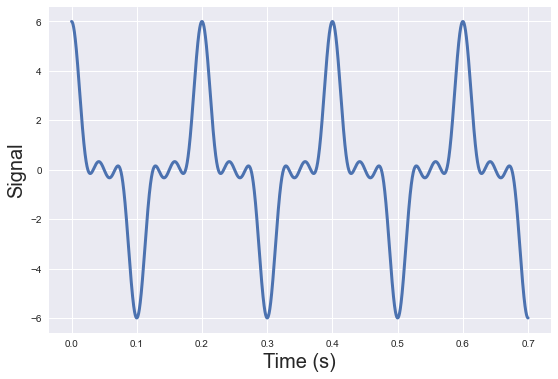

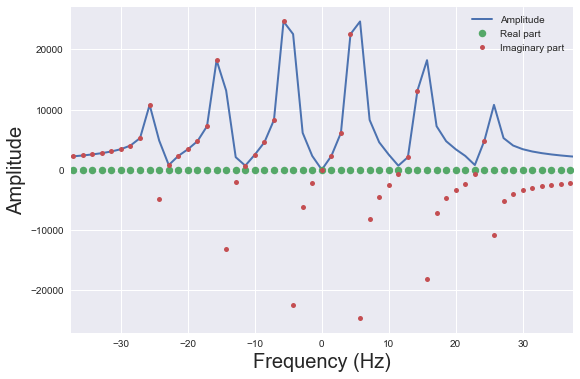

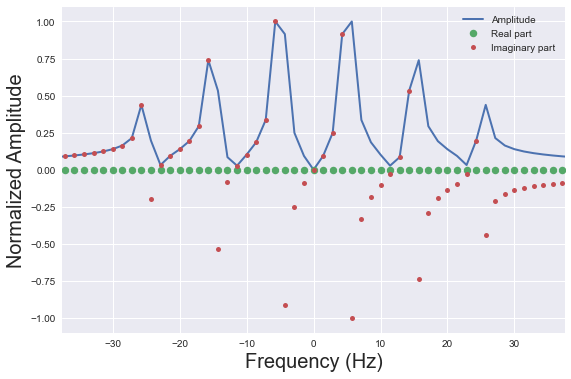

Fourier: 0.437 at -25.713 Hz
Fourier: 0.739 at -15.714 Hz
Fourier: 0.534 at -14.285 Hz
Fourier: 1.000 at -5.714 Hz
Fourier: 0.915 at -4.286 Hz
Fourier: 0.915 at 4.286 Hz
Fourier: 1.000 at 5.714 Hz
Fourier: 0.534 at 14.285 Hz
Fourier: 0.739 at 15.714 Hz
Fourier: 0.437 at 25.713 Hz


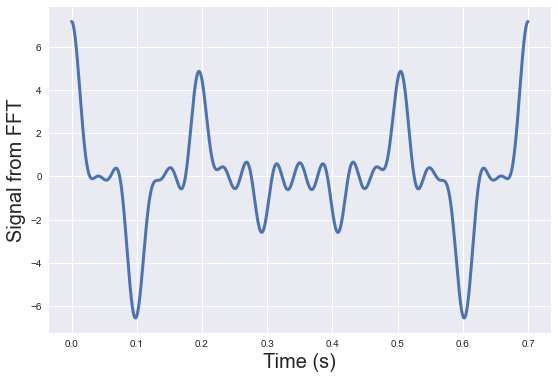

In [4]:
def signal(t: np.ndarray, f: float) -> np.ndarray:
    return 3 * np.cos(2 * np.pi * f * t) + 2 * np.cos(6 * np.pi * f * t) + np.cos(10 * np.pi * f * t)

H, Hn, f, t, n = take_fft(signal, f=5, cycles=3.5, tmin=0, N=24823)

peaks = np.abs(Hn) > 0.4
Hpeaks = Hn[peaks]
fpeaks = f[peaks]
for hpeak, fpeak in zip(Hpeaks, fpeaks):
    print(f"Fourier: {np.abs(hpeak):.3f} at {fpeak:.3f} Hz")
    
def signal_from_fft(peaks, H, f, n):
    Hpeaks = H[peaks]
    fpeaks = f[peaks]
    def signal(t):
        return np.sum(
            [
                np.abs(Hpeak) * np.cos(2 * np.pi * np.abs(fpeak) * t) / n
                for Hpeak, fpeak in zip(Hpeaks, fpeaks)
            ],
            axis=0
        )
    return signal

signal_from_H = signal_from_fft(peaks, H, f, n)

plt.figure(figsize=(9,6))
plt.plot(t, signal_from_H(t), linewidth=3)
plt.ylabel("Signal from FFT", fontsize=20)
plt.xlabel("Time (s)", fontsize=20)
plt.show()
plt.close()

<style>
p {
    font-size:14pt
}
h1 {
    color: Orange
}
</style>

# Analysis

As can be seen in the above plot, clearly adding together signals with respective frequencies and relative amplitudes $ 3:2:1 $ will return the orginal signal. We can then reconstruct the original signal as shown. However, when the number of cycles becomes non-integral, the fourier transform starts misbehaving and attempting to reconstruct the original signal becomes difficult. We can try to remedy this by changing the threshold by which we select which frequencies should be used in the reconstruction, but this is an imperfect solution. The closer the number of cycles gets to a whole number, the better the reconstruction behaves, but it is only perfect at integral values. The FFT expects a whole number of periods, so when we go to reconstruct the signal, it creates a signal that has a whole number of periods accross the given time domain.


# Excercise 2

Take the FFT of the half wave function, defined as 

$$
h(t) = \left\{\begin{array}{cc} 
\sin{2 \pi ft},\textrm{ for }0\leq t \leq\frac{T}{2}  \\[10pt]
0,\textrm{ for }\frac{T}{2}\leq t\leq T
\end{array}\right.
$$

This function is periodic, nonharmonic (with only the upper half of a sine wave), and continuous, but with discontinuous derivatives. Because it lacks the sharp corners of the sawtooth function, it is easier to reproduce with a finite Fourier series.

$$
h(t) = \frac{a_0}{2}+\sum_{n=1}^{\infty}a_n\cos{2\pi f_0nt}+b_n\sin{2\pi f_0nt}
$$

where 

$$
a_n = \left\{
\begin{array}{c} 
\frac{-2}{\pi(n^2-1)},\textrm{ $n$ even or 0}  \\[10pt]
0,\textrm{ $n$ odd}
\end{array}\right.
$$

$$
b_n = \left\{\begin{array}{c} 
\frac{1}{2},\ n=1  \\[10pt]
0, n\neq1
\end{array}\right.
$$

Verify that you get the correct harmonics, and they appear with the correct amplitude, or intensity for the power spectrum.

<div class="alert alert-block alert-info">
<b>Note:</b> Even if you use the method of generating exact cycles, you will never sample close enough to the dicontinuity to see exact frequencies. You can get quite close, but not exact.
</div>

<font color="blue">**Answer**</font>

Length of time   : 5.000 seconds.
Number of cycles : 5.000 cycles.
Sampling rate    : 199.800 Hz.


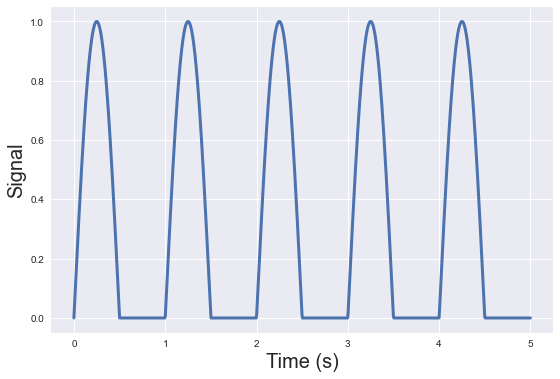

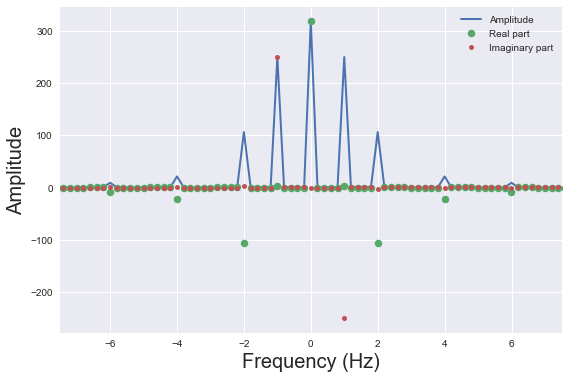

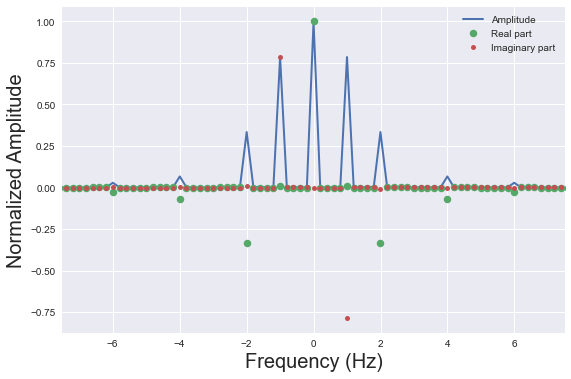

Amplitude of 106.263 at -1.998 Hz
Amplitude of 249.865 at -0.999 Hz
Amplitude of 317.991 at 0.000 Hz
Amplitude of 249.865 at 0.999 Hz
Amplitude of 106.263 at 1.998 Hz
Correct amplitude of 318.310 at 0 Hz
Correct amplitude of 250.000 at 1 Hz
Correct amplitude of 106.103 at 2 Hz
Correct amplitude of 21.221 at 4 Hz


In [5]:
def signal(t: np.ndarray, f: float) -> np.ndarray:
    T = 1 / f
    return np.array(
        [
            np.sin(2 * np.pi * f * t)
            if t - (T / 2) * (2 * (t // T) + 1) <= 0
            else 0
            for t in t
        ]
    )

N = 1000

H, Hn, f, t, n = take_fft(signal, f=1, N=N)

# Extract the first couple non-zero values
non_zero_H = H[np.abs(H) > N/10]
non_zero_f = f[np.abs(H) > N/10]

for amplitude, frequency in zip(non_zero_H, non_zero_f):
    print(f"Amplitude of {np.abs(amplitude):.3f} at {frequency:.3f} Hz")

# Correct amplitudes after accounting for sampling rate and the fact the cos(-x) = cos(x)
def correct(n: int) -> float:
    if n == 1:
        return N/4
    if n % 2 == 1:
        return 0
    return -N / (np.pi * (n**2 - 1))

for i in range(len(non_zero_H)):
    if amp := correct(i):
        print(
            f"Correct amplitude of {np.abs(amp):.3f} at {i} Hz"
        )

As we can see (I've only checked the first handful of harmonics), we do indeed get the correct amplitudes :)

# Excercise 3

Take the DFT of the non-periodic, normalized Gaussian function with a mean of 10, and variance of 0.4. Since the FFT assumes all functions are periodic, you will have to make sure there is lots of zero space around the Gaussian, so $t$ should run from zero to perhaps 20. In two plots, show both the Gaussian and $|H(f)|$.

What happens to the maximum nonzero frequency as you change the variance of the Gaussian function?

<font color="blue"> **Answer:** </font> 

Length of time   : 20.000 seconds.
Number of cycles : 20.000 cycles.
Sampling rate    : 12499.950 Hz.


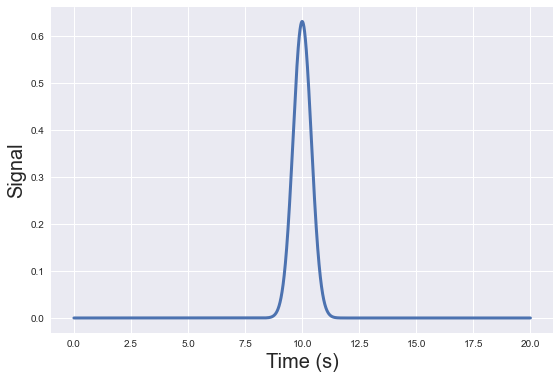

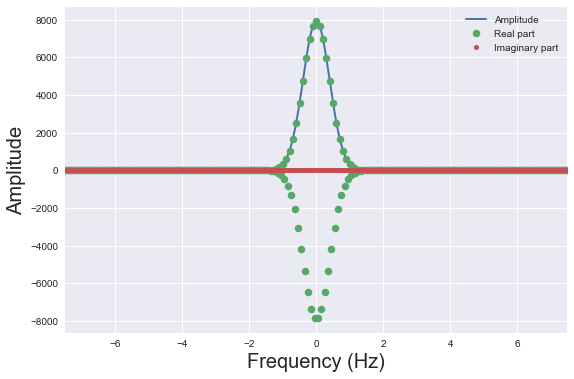

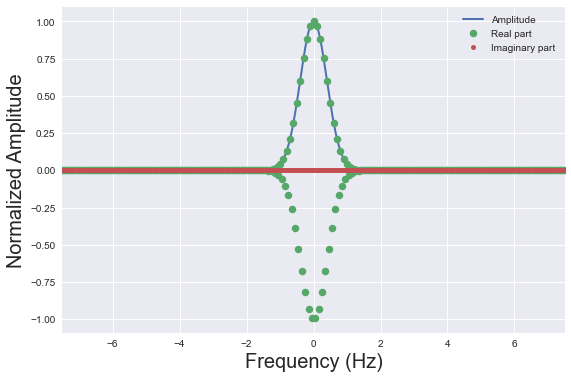

Length of time   : 20.000 seconds.
Number of cycles : 20.000 cycles.
Sampling rate    : 12499.950 Hz.


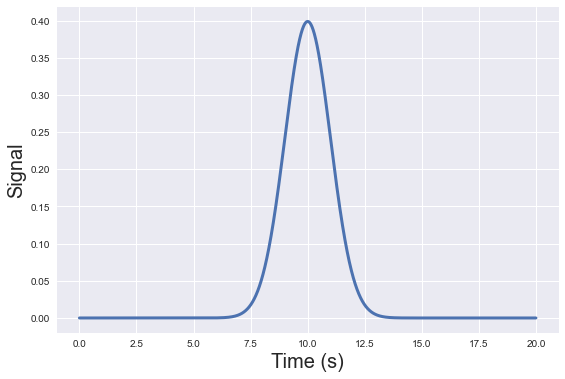

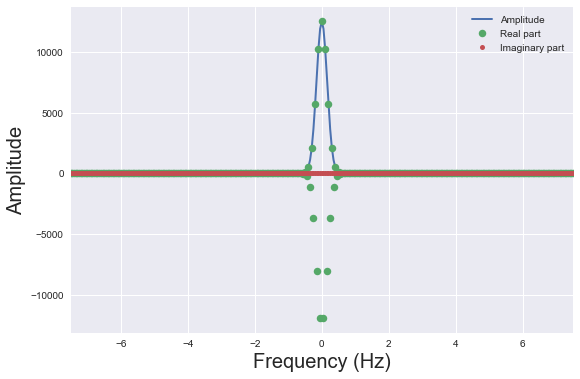

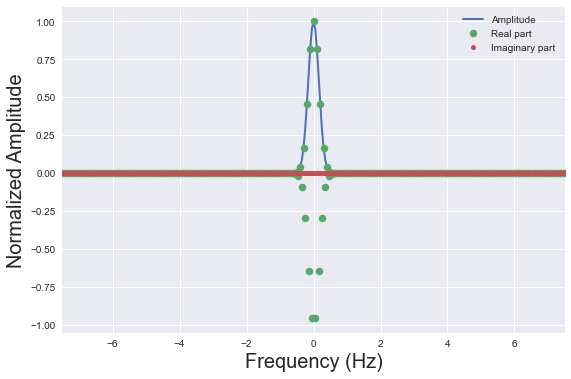

Length of time   : 20.000 seconds.
Number of cycles : 20.000 cycles.
Sampling rate    : 12499.950 Hz.


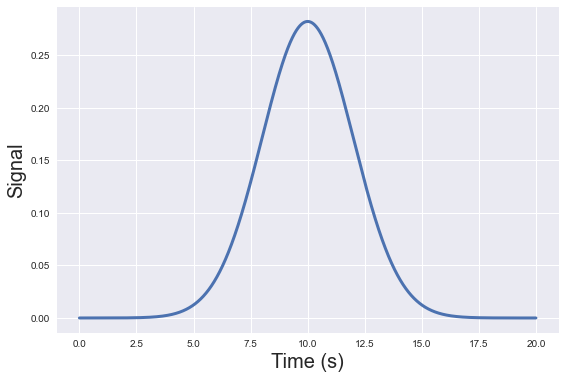

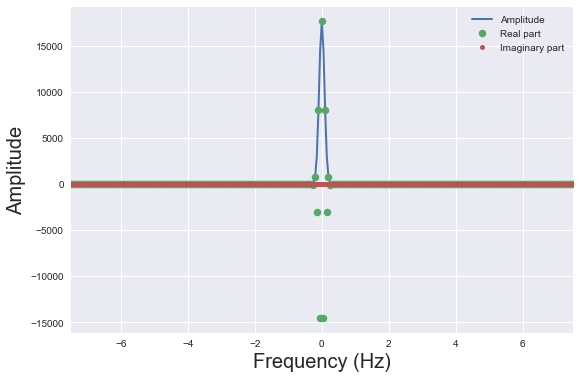

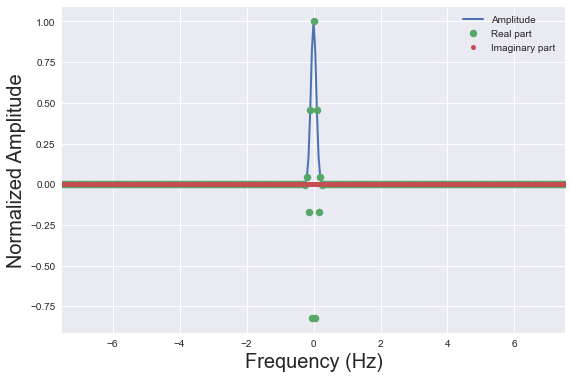

In [6]:
def gaussian(t: np.ndarray, f: float, **kwargs: dict) -> np.ndarray:
    mean = kwargs.get("mean", 10)
    var = kwargs.get("var", 0.4)
    return (1 / np.sqrt(var * 2 * np.pi)) * np.exp(-(1/2) * (t - mean)**2 / var**2)

H, Hn, f, t, n = take_fft(gaussian, f=1, cycles=20, tmin=0, N=250000, mean=10, var=0.4)
H, Hn, f, t, n = take_fft(gaussian, f=1, cycles=20, tmin=0, N=250000, mean=10, var=1)
H, Hn, f, t, n = take_fft(gaussian, f=1, cycles=20, tmin=0, N=250000, mean=10, var=2)

As we increase the variance, the guassian looks more and more like a sinusoid, so the number of harmonics needed in the fourier representation decreases; this is why we can see the peak in the fourier transform getting smaller and smaller with larger variance.

# Excercise 4

Calculate **your own spectrogram** of the any of the recorded sounds and plot the 2D result using a log scale. You must use `scipy.fft.fft`.  This will take some time to compute, so test with larger window shifts first.

Set the window length to be $w=2048$, and the window shift between the FFT to be $\delta=2048/16$. The number of spectrum you will need to calculate will be $n=(N-w)/\delta$, where $N$ is the number of time data points that were sampled at the sampling rate of 44100 Hz, or whatever the recorded rate was. Your 2D spectrogram will be of size $(n,w)$.

It will not look as good as the example from the lecture notebook because we are not filtering the data. But you should still see the sounds and overtones as in the example.

<font color="blue"> **Answer:** </font> 

In [7]:
def spectrogram(data: np.ndarray, rate: int, w: int = 2048, d: int = 2048//16) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    n = (data.size - w) // d

    dt = 1 / rate

    t = np.linspace(0, len(data) * dt, n)
    Sxx = np.zeros((w, n))

    for i in range(n):
        splice = data[i * d: i * d + w]
        H = scipy.fft.fftshift(
            scipy.fft.fft(splice)
        )
        Sxx[:, i] = np.abs(H)

    f = scipy.fft.fftshift(
        scipy.fft.fftfreq(Sxx[:, -1].size, dt)
    )

    return f, t, Sxx


## Violin

In [8]:
file = Path(r"./violin.mp3")

sound = pd.AudioSegment.from_mp3(file)
# get raw audio data as a bytestring
raw_data = sound.raw_data
# get the frame rate
sample_rate = sound.frame_rate
# get amount of bytes contained in one sample
sample_size = sound.sample_width
# get channels
channels = sound.channels
print("Sample rate         :", sample_rate, "data samples per second")
print("Sample size (bytes) :", sample_size*channels)
# byte size = channels*sample_size, should be two bytes
data = np.frombuffer(raw_data, dtype=np.int16)
print("Data size           :", data.size)
print("Data shape          :", data.shape)
data.tofile("violin.dat")


Sample rate         : 44100 data samples per second
Sample size (bytes) : 2
Data size           : 54144
Data shape          : (54144,)


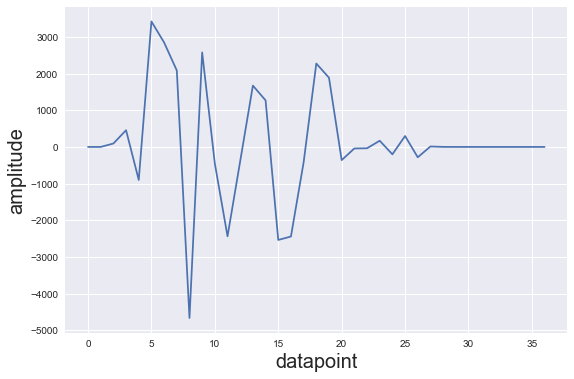

<ipython-input-9-b73779c489ad>:19: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, np.log10(Sxx), cmap=cmap1, shading='auto')


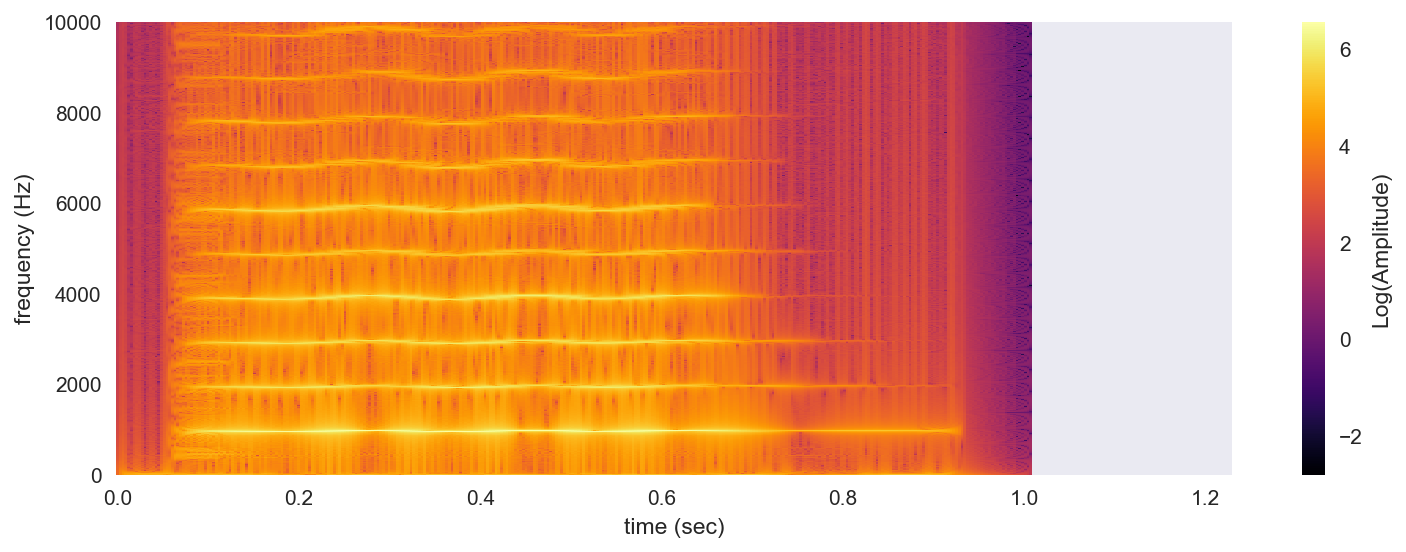

<ipython-input-9-b73779c489ad>:37: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, np.log10(Sxx), cmap=cmap1, shading='auto')


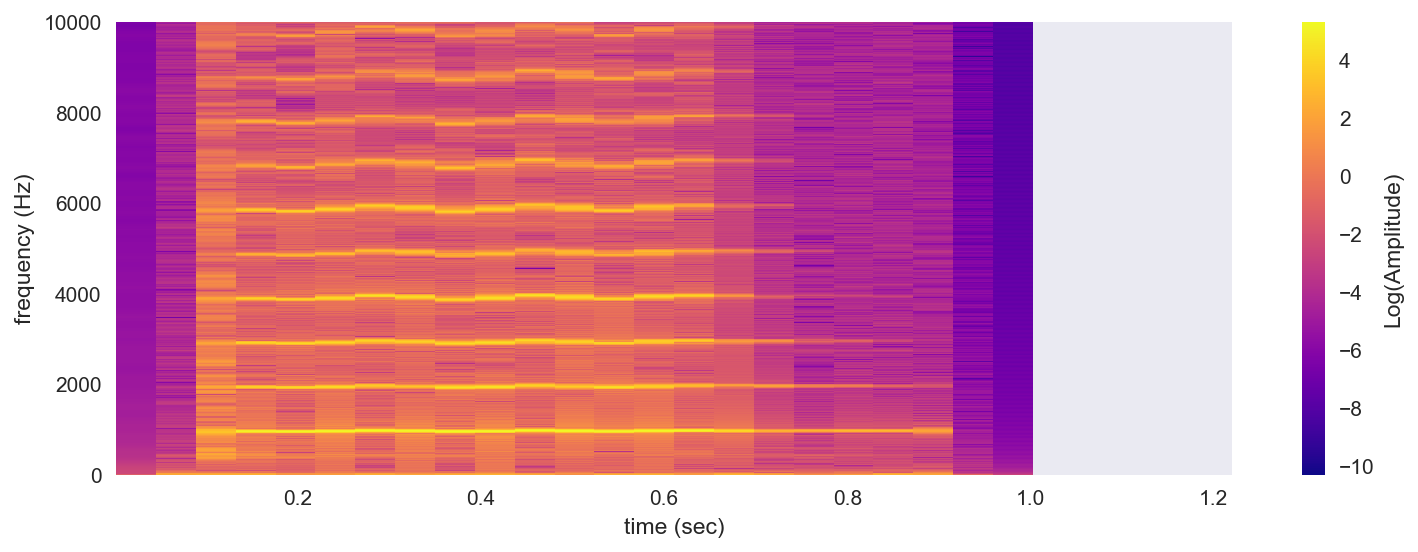

In [9]:
violin = np.fromfile("violin.dat", dtype=np.int16)

plt.figure(figsize=(9, 6))
plt.plot(data[::1500])
plt.ylabel("amplitude", fontsize=20)
plt.xlabel("datapoint", fontsize=20)
plt.show()
plt.close()

f, t, Sxx = spectrogram(
    data=violin,
    rate=sample_rate,
    w=2048,
    d=2048//16
)

cmap1 = plt.get_cmap('inferno')
plt.figure(num=None, figsize=(12, 4), dpi=150, facecolor='w', edgecolor='k')
plt.pcolormesh(t, f, np.log10(Sxx), cmap=cmap1, shading='auto')
plt.ylim(0, 10000)
plt.colorbar(label="Log(Amplitude)")
plt.xlabel("time (sec)")
plt.ylabel("frequency (Hz)")
plt.show()
plt.close()

f, t, Sxx = scipy.signal.spectrogram(
    violin,
    window=('hamming'),
    fs=sample_rate,
    nperseg=2048,
    noverlap=2048//16
)

cmap1 = plt.get_cmap('plasma')
plt.figure(num=None, figsize=(12, 4), dpi=150, facecolor='w', edgecolor='k')
plt.pcolormesh(t, f, np.log10(Sxx), cmap=cmap1, shading='auto')
plt.ylim(0, 10000)
plt.colorbar(label="Log(Amplitude)")
plt.xlabel("time (sec)")
plt.ylabel("frequency (Hz)")
plt.show()
plt.close()


## Scatman just for fun

I wanted to see scatman using the method used in class

In [10]:
file = Path(r"./scatman.mp3")

scatman = pd.AudioSegment.from_mp3(file)

raw_data = scatman.raw_data
# get the frame rate
sample_rate = scatman.frame_rate
# get amount of bytes contained in one sample
sample_size = scatman.sample_width
# get channels
channels = scatman.channels
print("Sample rate         :", sample_rate, "data samples per second")
print("Sample size (bytes) :", sample_size * channels)
# byte size = channels*sample_size, should be two bytes
data = np.frombuffer(raw_data, dtype=np.int16)
print("Data size           :", data.size)
print("Data shape          :", data.shape)
data.tofile("scatman.dat")


Sample rate         : 48000 data samples per second
Sample size (bytes) : 4
Data size           : 20244830
Data shape          : (20244830,)


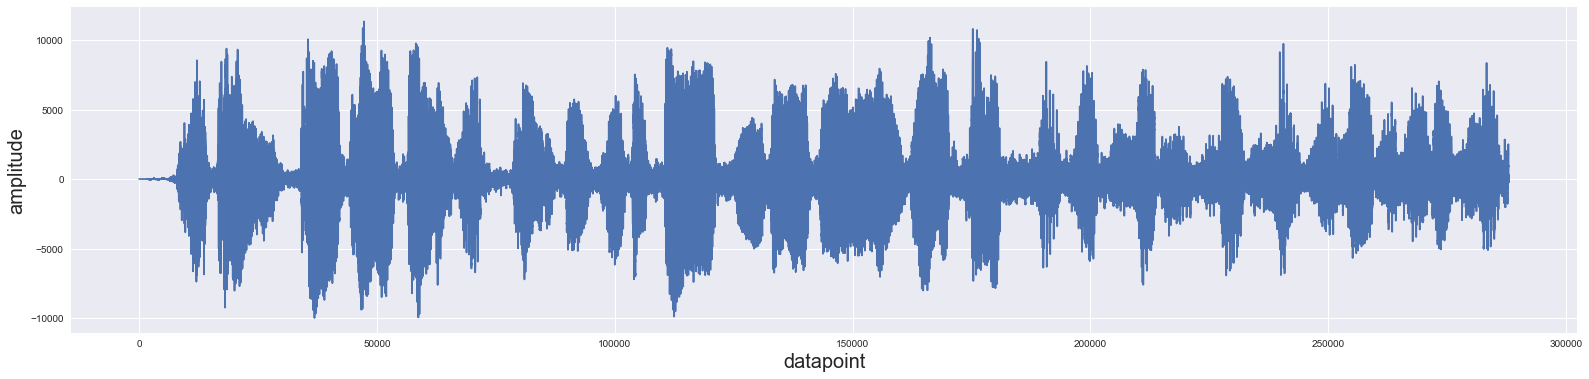

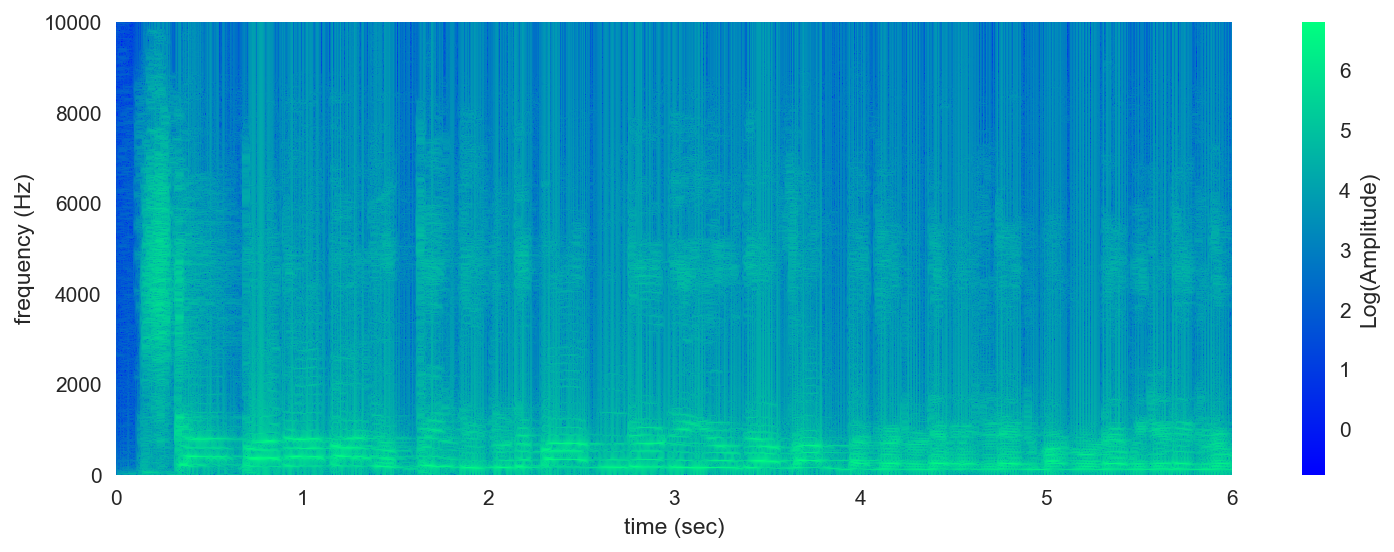

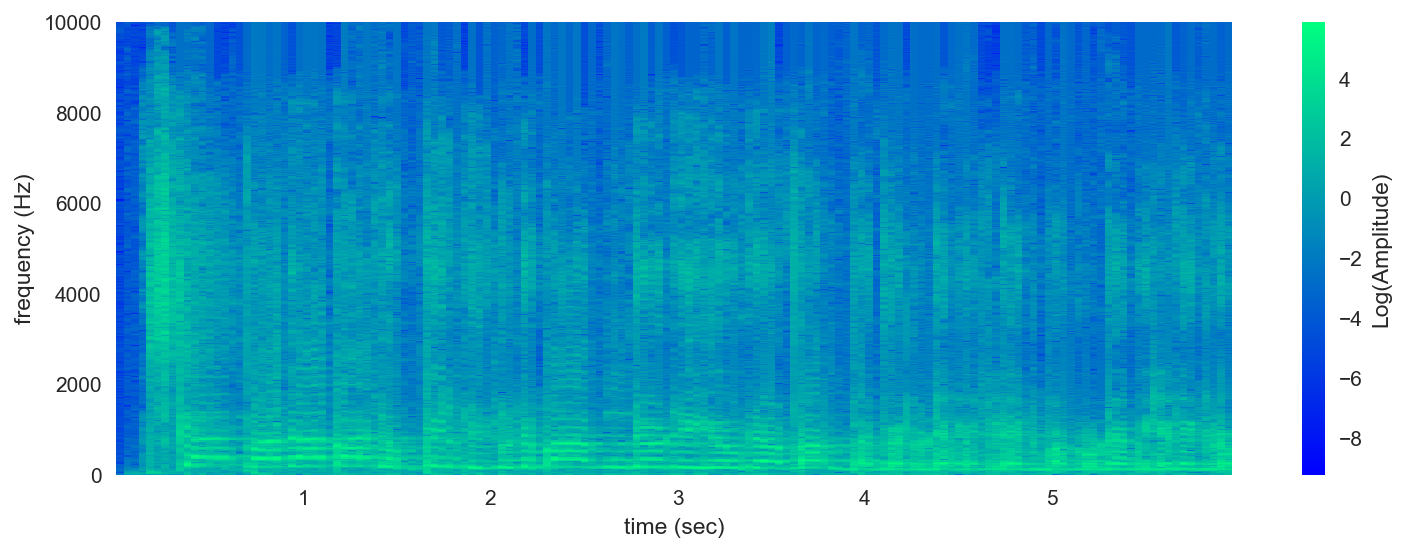

In [11]:
scatman = np.fromfile("scatman.dat", dtype=np.int16)

t_min = 0
t_max = 6

data = scatman[t_min * sample_rate: t_max * sample_rate]

plt.figure(figsize=(27, 6))
plt.plot(data)
plt.ylabel("amplitude", fontsize=20)
plt.xlabel("datapoint", fontsize=20)
plt.show()
plt.close()

f, t, Sxx = spectrogram(
    data=data,
    rate=sample_rate,
    w=2048,
    d=2048//16
)

cmap1 = plt.get_cmap('winter')
plt.figure(num=None, figsize=(12, 4), dpi=150, facecolor='w', edgecolor='k')
plt.pcolormesh(t, f, np.log10(Sxx), cmap=cmap1, shading='auto')
plt.ylim(0, 10000)
plt.colorbar(label="Log(Amplitude)")
plt.xlabel("time (sec)")
plt.ylabel("frequency (Hz)")
plt.show()
plt.close()

f, t, Sxx = scipy.signal.spectrogram(
    data,
    window=('hamming'),
    fs=sample_rate,
    nperseg=2048,
    noverlap=2048//16
)

cmap1 = plt.get_cmap('winter')
plt.figure(num=None, figsize=(12, 4), dpi=150, facecolor='w', edgecolor='k')
plt.pcolormesh(t, f, np.log10(Sxx), cmap=cmap1, shading='auto')
plt.ylim(0, 10000)
plt.colorbar(label="Log(Amplitude)")
plt.xlabel("time (sec)")
plt.ylabel("frequency (Hz)")
plt.show()
plt.close()


## Cellos

In [12]:
file = Path(r"./cellos.wav")

cellos = pd.AudioSegment.from_wav(file)

raw_data = cellos.raw_data
# get the frame rate
sample_rate = cellos.frame_rate
# get amount of bytes contained in one sample
sample_size = cellos.sample_width
# get channels
channels = cellos.channels
print("Sample rate         :", sample_rate, "data samples per second")
print("Sample size (bytes) :", sample_size * channels)
# byte size = channels*sample_size, should be two bytes
data = np.frombuffer(raw_data, dtype=np.int16)
print("Data size           :", data.size)
print("Data shape          :", data.shape)
data.tofile("cellos.dat")


Sample rate         : 44100 data samples per second
Sample size (bytes) : 4
Data size           : 11563022
Data shape          : (11563022,)


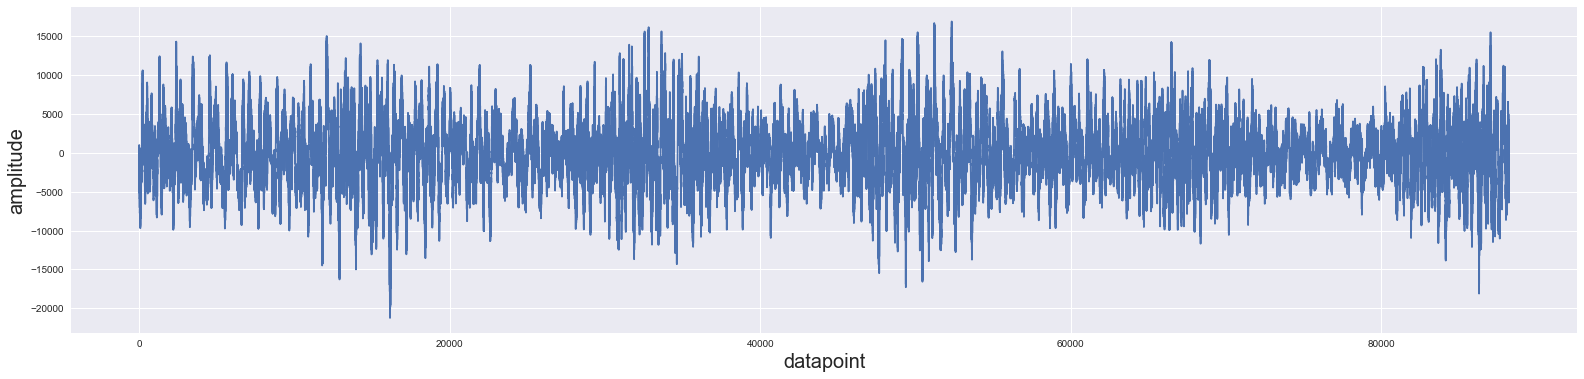

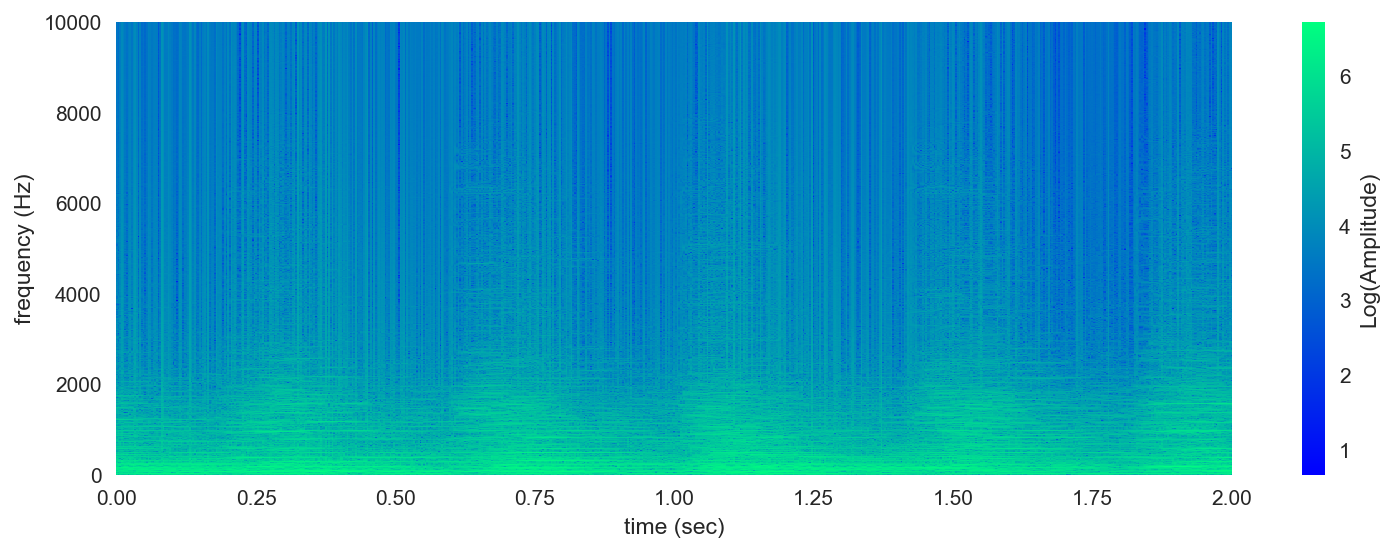

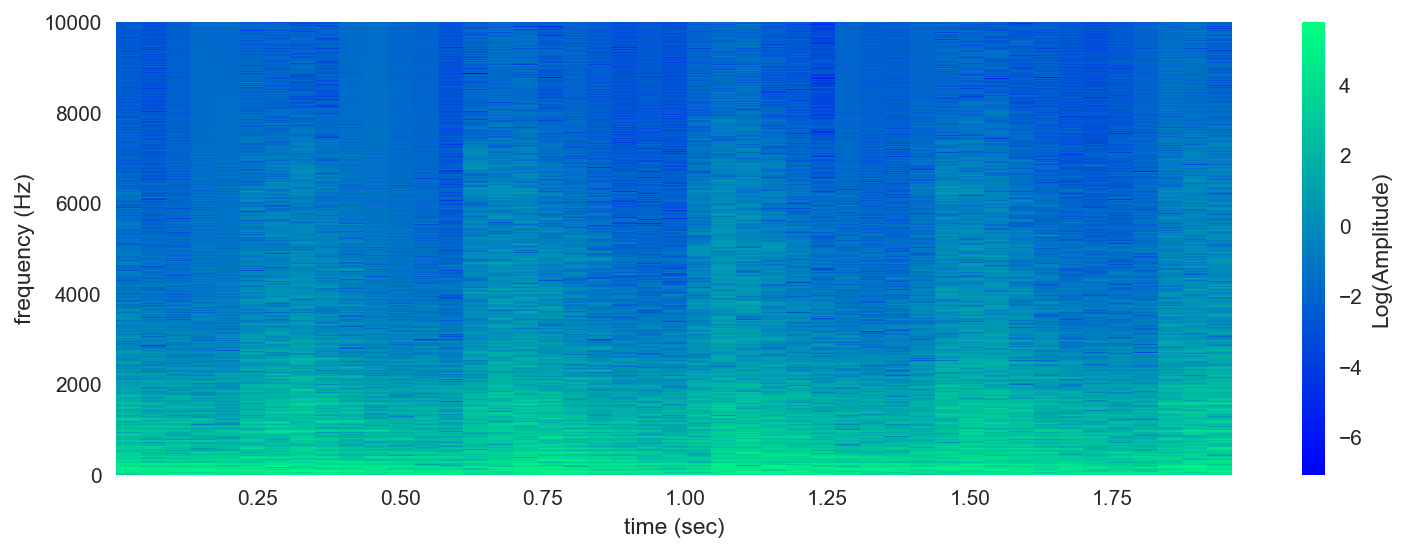

In [13]:
cellos = np.fromfile("cellos.dat", dtype=np.int16)

t_min = 28
t_max = 30

data = cellos[t_min * sample_rate: t_max * sample_rate]

plt.figure(figsize=(27, 6))
plt.plot(data)
plt.ylabel("amplitude", fontsize=20)
plt.xlabel("datapoint", fontsize=20)
plt.show()
plt.close()

f, t, Sxx = spectrogram(
    data=data,
    rate=sample_rate,
    w=2048,
    d=2048//16
)

cmap1 = plt.get_cmap('winter')
plt.figure(num=None, figsize=(12, 4), dpi=150, facecolor='w', edgecolor='k')
plt.pcolormesh(t, f, np.log10(Sxx), cmap=cmap1, shading='auto')
plt.ylim(0, 10000)
plt.colorbar(label="Log(Amplitude)")
plt.xlabel("time (sec)")
plt.ylabel("frequency (Hz)")
plt.show()
plt.close()

f, t, Sxx = scipy.signal.spectrogram(
    data,
    window=('hamming'),
    fs=sample_rate,
    nperseg=2048,
    noverlap=2048//16
)

cmap1 = plt.get_cmap('winter')
plt.figure(num=None, figsize=(12, 4), dpi=150, facecolor='w', edgecolor='k')
plt.pcolormesh(t, f, np.log10(Sxx), cmap=cmap1,shading='auto')
plt.ylim(0, 10000)
plt.colorbar(label="Log(Amplitude)")
plt.xlabel("time (sec)")
plt.ylabel("frequency (Hz)")
plt.show()
plt.close()
